In [21]:
from google.colab import files
files.upload()

Saving test-32data-fastward-onlylabel.save.zip to test-32data-fastward-onlylabel.save.zip


In [1]:
import json
import pickle

import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
from keras.layers import *
from keras.models import Sequential
from keras.models import model_from_json
from keras.optimizers import Adam

np.random.seed(1234)

Using TensorFlow backend.


In [23]:
!unzip test-32data-fastward-onlylabel.save.zip

Archive:  test-32data-fastward-onlylabel.save.zip
  inflating: test-32data-fastward-onlylabel.save  


In [2]:
def get_image_data(num_training=63000, num_validation=1000, num_test=10000):
    """
    Load the image dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.
    """
    # Load the raw image data
    image_dir = "test-32data.save"

    data = pickle.load(open(image_dir, 'rb'))
    data_label=pickle.load(open('test-32data-fastward-onlylabel.save','rb'))
    X_train, y_train, X_test, y_test = data['data'][:80000],data_label[:80000],data['data'][80000:],data_label[80000:]
    X_train=np.array(X_train,'float64')
    y_train= np.array(y_train,'float64')
    X_test=np.array(X_test,'float64')
    y_test=np.array(y_test,'float64')
    # Subsample the data
    mask = range(num_training, num_training + num_validation)
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = range(num_training)
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = range(num_test)
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    return X_train, y_train, X_val, y_val, X_test, y_test
  
 

# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_image_data()
y_train=y_train.reshape(-1,42)
y_val=y_val.reshape(-1,42)
y_test=y_test.reshape(-1,42)
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
set_session(tf.Session(config=config))

model = Sequential([
    Convolution2D(
        nb_filter=12,
        nb_row=5,
        nb_col=5,
        subsample=(2, 2),
        input_shape=(32, 32, 3)
    ),
    LeakyReLU(
        alpha=0.05
    ),
    Convolution2D(
        nb_filter=12,
        nb_row=5,
        nb_col=5,
        subsample=(2, 2),
    ),
    LeakyReLU(
        alpha=0.05
    ),
    Convolution2D(
        nb_filter=12,
        nb_row=5,
        nb_col=5,
    ),
    LeakyReLU(
        alpha=0.05
    ),
    Flatten(),
    Dense(
        output_dim=1024,
        activation='relu'
    ),
    Dense(
        output_dim=1024,
        activation='relu'
    ),
#         Dense(
#             output_dim=30,
#         ),
    Dense(
        output_dim=42,
#             weights=(pca_eigenvectors, pca_mean),
        trainable=False
    )
])

model.compile(
    optimizer=Adam(),
    loss='mse'
)

model.fit(
    X_train,
    y_train,
    batch_size=100,
    epochs=30,
)


Train data shape:  (63000, 32, 32, 3)
Train labels shape:  (63000, 42)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000, 42)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000, 42)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:60: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(input_shape=(32, 32, 3..., kernel_size=(5, 5), filters=12, strides=(2, 2))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(kernel_size=(5, 5), filters=12, strides=(2, 2))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(kernel_size=(5, 5), filters=12)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:85: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=1024)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:89: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=1024)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:97: UserWarning: Update your `Dense` call to the Keras 2 API:

Epoch 1/30
63000/63000 [==============================] - 9s 142us/step - loss: 18.7187
Epoch 2/30
63000/63000 [==============================] - 8s 121us/step - loss: 12.9494
Epoch 3/30
63000/63000 [==============================] - 8s 123us/step - loss: 11.9861
Epoch 4/30
39600/63000 [=================>............] - ETA: 3s - loss: 11.3961

63000/63000 [==============================] - 8s 127us/step - loss: 11.3171
Epoch 5/30
63000/63000 [==============================] - 8s 121us/step - loss: 10.8660
Epoch 6/30
63000/63000 [==============================] - 8s 123us/step - loss: 10.5336
Epoch 7/30
59400/63000 [===========================>..] - ETA: 0s - loss: 10.2653

63000/63000 [==============================] - 7s 117us/step - loss: 10.2726
Epoch 8/30
63000/63000 [==============================] - 8s 122us/step - loss: 10.0346
Epoch 9/30
63000/63000 [==============================] - 8s 120us/step - loss: 9.9060
Epoch 10/30
63000/63000 [==============================] - 8s 122us/step - loss: 9.8223


Epoch 11/30
63000/63000 [==============================] - 8s 122us/step - loss: 9.7590
Epoch 12/30
63000/63000 [==============================] - 8s 127us/step - loss: 9.7068
Epoch 13/30
63000/63000 [==============================] - 8s 123us/step - loss: 9.6417
Epoch 14/30
40700/63000 [==================>...........] - ETA: 2s - loss: 9.6238

63000/63000 [==============================] - 8s 122us/step - loss: 9.6003
Epoch 15/30
63000/63000 [==============================] - 8s 122us/step - loss: 9.5210
Epoch 16/30
63000/63000 [==============================] - 8s 128us/step - loss: 9.5255
Epoch 17/30
55400/63000 [=========================>....] - ETA: 0s - loss: 9.4704

63000/63000 [==============================] - 8s 124us/step - loss: 9.4812
Epoch 18/30
63000/63000 [==============================] - 8s 123us/step - loss: 9.4311
Epoch 19/30
63000/63000 [==============================] - 8s 125us/step - loss: 9.3940
Epoch 20/30
60400/63000 [===========================>..] - ETA: 0s - loss: 9.3460

63000/63000 [==============================] - 8s 123us/step - loss: 9.3614
Epoch 21/30
63000/63000 [==============================] - 8s 121us/step - loss: 9.3239
Epoch 22/30
63000/63000 [==============================] - 8s 121us/step - loss: 9.2816
Epoch 23/30
61500/63000 [============================>.] - ETA: 0s - loss: 9.2512

63000/63000 [==============================] - 8s 126us/step - loss: 9.2472
Epoch 24/30
63000/63000 [==============================] - 8s 121us/step - loss: 9.2654
Epoch 25/30
63000/63000 [==============================] - 8s 123us/step - loss: 9.2431
Epoch 26/30
63000/63000 [==============================] - 8s 122us/step - loss: 9.1960
Epoch 27/30
  100/63000 [..............................] - ETA: 9s - loss: 10.4058

63000/63000 [==============================] - 8s 125us/step - loss: 9.1927
Epoch 28/30
63000/63000 [==============================] - 8s 123us/step - loss: 9.1429
Epoch 29/30
63000/63000 [==============================] - 8s 122us/step - loss: 9.1172
Epoch 30/30
50200/63000 [======================>.......] - ETA: 1s - loss: 9.0857

63000/63000 [==============================] - 8s 123us/step - loss: 9.1039


(1, 21, 2)


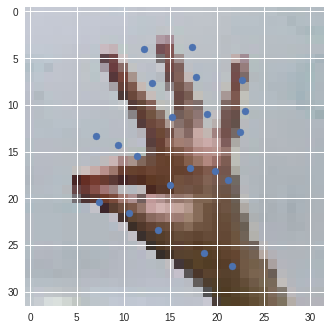

In [7]:
# demo=X_train[1]

# sample = np.array(X_train,'float64')
# mean_image = np.mean(sample, axis=0)
# sample -= mean_image

# Load the raw image data
image_dir = "test-32data.save"

data = pickle.load(open(image_dir, 'rb'))
X_train, y_train, X_test, y_test = data['data'][:80000],data['label'][:80000],data['data'][80000:],data['label'][80000:]

demo=X_test[1000]

sample = np.array(X_test,'float64')
mean_image = np.mean(sample, axis=0)
sample -= mean_image


predictions = model.predict(sample)
out = predictions[1000].reshape(-1, 21, 2)

print(out.shape)
# print(out[0])
# pdb.set_trace()

plt.imshow(cv2.cvtColor(demo, cv2.COLOR_BGR2RGB))
plt.scatter(out[0][:, 1], out[0][:, 0])
plt.show()